# Assignment: Linear Models
## Do three questions.
### `! git clone https://github.com/ds4e/linearModels`

**Q1.** Please answer the following questions in your own words.

1. What makes a model "linear"? "Linear" in what?
2. How do you interpret the coefficient for a dummy/one-hot-encoded variable? (This is a trick question, and the trick involves how you handle the intercept of the model.)
3. Can linear regression be used for classification? Explain why, or why not.
4. What are signs that your linear model is over-fitting?
5. Clearly explain multi-colinearity using the two-stage least squares technique.
6. How can you incorporate nonlinear relationships between your target/response/dependent/outcome variable $y$ and your features/control/response/independent variables $x$ into your analysis?
7. What is the interpretation of the intercept? A slope coefficient for a variable? The coefficient for a dummy/one-hot-encoded variable?

1. A model is considered "linear" if it is linear in its parameters, meaning that the relationship between the dependent variable y and the independent variables x is expressed as a linear combination of coefficients. This means that while the independent variables can be transformed (like by logarithmic or polynomial transformations), the model remains linear as long as the coefficients appear in a linear form. In contrast, a model would be nonlinear if the coefficients themselves were multiplied or interacted in complex ways.

2. The interpretation of the coefficient of a dummy/one-hot-encoded variable depends on how the model handles the intercept. If the intercept is included, one category serves as the reference, and the dummy variable’s coefficient represents the difference between that category’s mean and the reference category’s mean. If the intercept is omitted, each coefficient represents the mean of its respective category. For example, if we model income based on education level, the coefficient for a "Master’s degree" variable tells us how much more (or less) income someone with a Master’s earns compared to the reference category (which could be someone with a Bachelor’s degree).

3. Linear regression is not ideal for classification because it predicts continuous values rather than discrete categories. While someoneone might apply a threshold to transform regression outputs into classifications, this approach can lead to poor predictions, especially when the underlying relationship is not linear. Logistic regression is preferred for classification problems because it models the probability of belonging to a class using a sigmoid function, which ensures that outputs remain between 0 and 1.

4. Overfitting in a linear model can be identified by a high R^2 in training but a much lower R^2 in testing, large variance in cross-validation scores, unnecessarily complex models with too many predictors, and unrealistically large coefficients. These indicate that the model is capturing noise rather than meaningful patterns, which leads to to poor generalization to new data.

5. Multi-collinearity arises when independent variables are highly correlated, making it difficult to separate their individual effects. This leads to unstable coefficients and inflated standard errors. One way to address multi-collinearity is through the two-stage least squares method, which is commonly used when an independent variable is endogenous or correlated with the error term. In the first stage, a problematic variable is replaced by its predicted values from an instrument that is correlated with it but uncorrelated with the error. The second stage then uses these predicted values instead of the original variable, which helps to eliminate collinearity and bias.

6. Nonlinear relationships between y and x can be incorporated into a regression model using transformations such as polynomial terms (like adding x^2 to capture curvature), logarithmic transformations (to linearize exponential relationships), interaction terms (to model how two variables affect each other), spline regression (which allows different slopes in different regions), or generalized additive models (which introduce smooth, flexible functions for predictors).

7. The interpretation of regression coefficients depends on their role in the model. The intercept (β0) represents the expected value of y when all independent variables are zero, though in some cases this may not have practical meaning. A slope coefficient (βj​) represents the expected change in y for a one-unit increase in xj, holding all other variables constant. The coefficient for a dummy variable represents the expected difference in y between the category represented by the dummy and the reference category. For example, in a salary model where "Master’s degree" and "PhD" are dummy variables, the coefficient for "Master’s degree" represents the salary difference between someone with a Master’s and someone with a Bachelor’s (which is the reference category), while the PhD coefficient represents the difference between PhD holders and Bachelor’s holders.

**Q2.** Load `./data/Q1_clean.csv`. The data include

- `Price` per night
- `Review Scores Rating`: The average rating for the property
- `Neighbourhood `: The bourough of NYC. Note the space, or rename the variable.
- `Property Type`: The kind of dwelling
- `Room Type`: The kind of space being rented

1. Compute the average prices and scores by `Neighbourhood `; which bourough is the most expensive on average? Create a kernel density plot of price and log price, grouping by `Neighbourhood `.
2. Regress price on `Neighbourhood ` by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model and using all the data. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?
3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?
4. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood `. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
5. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood ` and `Property Type`. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
6. What does the coefficient on `Review Scores Rating` mean if it changes from part 4 to 5? Hint: Think about how multilple linear regression works.
7. (Optional) We've included `Neighborhood ` and `Property Type` separately in the model. How do you interact them, so you can have "A bedroom in Queens" or "A townhouse in Manhattan". Split the sample 80/20 into a training and a test set and run a regression including that kind of "property type X neighborhood" dummy, plus `Review Scores Rating`. How does the slope coefficient for `Review Scores Rating`, the $R^2$, and the RMSE change? Do they increase significantly compares to part 5? Are the coefficients in this regression just the sum of the coefficients for `Neighbourhood ` and `Property Type` from 5? What is the most expensive kind of property you can rent?

**Q3.** This question is a case study for linear models. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use `pd.get_dummies()`; be careful of the dummy variable trap); what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 4?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

**Q4.** This question refers to the `heart_hw.csv` data. It contains three variables:

  - `y`: Whether the individual survived for three years, coded 0 for death and 1 for survival
  - `age`: Patient's age
  - `transplant`: `control` for not receiving a transplant and `treatment` for receiving a transplant

Since a heart transplant is a dangerous operation and even people who successfully get heart transplants might suffer later complications, we want to look at whether a group of transplant recipients tends to survive longer than a comparison group who does not get the procedure.

1. Compute (a) the proportion of people who survive in the control group who do not receive a transplant, and (b) the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group. In a randomized controlled trial, this is called the **average treatment effect**.
2. Regress `y` on `transplant` using a linear model with a constant. How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1? Explain the relationship clearly.
3. We'd like to include `age` in the regression, since it's reasonable to expect that older patients are less likely to survive an extensive surgery like a heart transplant. Regress `y` on a constant, transplant, and age. How does the intercept change?
4. Build a more flexible model that allows for non-linear age effects and interactions between age and treatment. Use a train-test split to validate your model. Estimate your best model, predict the survival probability by age, and plot your results conditional on receiving a transplant and not. Describe what you see.
5. Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ. What are your concerns about how it is built and how it is deployed?

In [25]:
import pandas as pd

data = pd.read_csv("/content/heart_hw.csv")
data.head()



,Unnamed: 0,age,transplant,y
0,1,53,control,0
1,2,43,control,0
2,3,52,control,0
3,4,52,control,0
4,5,54,control,0


In [26]:
print(data["transplant"].unique())
# Convert categorical values to 0 and 1
data["transplant"] = data["transplant"].map({"treatment": 1, "control": 0})

#drop NaNs
data = data.dropna(subset=["transplant"])

data.head()


['control' 'treatment']


,Unnamed: 0,age,transplant,y
0,1,53,0,0
1,2,43,0,0
2,3,52,0,0
3,4,52,0,0
4,5,54,0,0


In [27]:
#1a: Survival rate in control group (transplant = 0)
control_survival_rate = data[data["transplant"] == 0]["y"].mean()
print(f"Proportion of survival in control group: {control_survival_rate:.4f}")

#1b: Survival rate in treatment group (transplant = 1)
treatment_survival_rate = data[data["transplant"] == 1]["y"].mean()

# Compute Average Treatment Effect (ATE)
ATE = treatment_survival_rate - control_survival_rate
print(f"Difference in survival proportions (ATE): {ATE:.4f}")

Proportion of survival in control group: 0.1176
Difference in survival proportions (ATE): 0.2302


In [28]:
#2: Regression of survival on transplant
import statsmodels.api as sm

#Define independent variable (with constant)
X = sm.add_constant(data["transplant"])  # Adds an intercept term
y = data["y"]

#Run the regression
model = sm.OLS(y, X).fit()

#Display regression summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     6.354
Date:                Mon, 24 Mar 2025   Prob (F-statistic):             0.0133
Time:                        02:36:54   Log-Likelihood:                -59.591
No. Observations:                 103   AIC:                             123.2
Df Residuals:                     101   BIC:                             128.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1176      0.075      1.574      0.1

The constant (intercept) in the regression model represents the estimated survival probability for patients who did not receive a transplant (control group). In my previous proportion calculations, I found that the proportion of patients who survived in the control group was 0.1176, which matches exactly with the intercept value in the regression output. This confirms that the regression is correctly estimating the mean survival rate for the control group. Similarly, the coefficient on the transplant variable represents the difference in survival probabilities between those who received a transplant and those who did not. This coefficient was 0.2302, which aligns perfectly with the difference in survival rates (the Average Treatment Effect, or ATE) calculated in the first part. This relationship exists because the regression with a binary treatment variable (transplant: 0 or 1) is mathematically equivalent to comparing group means. Essentially, the model estimates survival as the sum of the control group's average survival rate (intercept) and the treatment effect (coefficient on transplant), which is why the results from both methods match.

In [29]:
#3: Regression with age
#Define independent variables (transplant + age)
X = sm.add_constant(data[["transplant", "age"]])

#Run the regression
model_with_age = sm.OLS(y, X).fit()

#Display regression summary
print(model_with_age.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     8.602
Date:                Mon, 24 Mar 2025   Prob (F-statistic):           0.000357
Time:                        02:36:57   Log-Likelihood:                -54.558
No. Observations:                 103   AIC:                             115.1
Df Residuals:                     100   BIC:                             123.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7020      0.196      3.583      0.0

When age is included in the regression model, the intercept increases significantly from 0.1176 (in the previous model without age) to 0.7020. This change occurs because the intercept in a regression model represents the estimated survival probability when all independent variables are equal to zero. In the initial model, the intercept reflected the average survival probability for the control group (those who did not receive a transplant). However, in the new model, the intercept represents the estimated survival probability for a patient with age = 0 who did not receive a transplant. Since age is not realistically zero in this dataset, the intercept is now an extrapolated value rather than a meaningful survival probability for any real patient. Additionally, the inclusion of age as a predictor allows the model to adjust for the negative relationship between age and survival, which is reflected in the coefficient for age (-0.0136). This means that for each additional year of age, the predicted survival probability decreases by approximately 1.36 percentage points, holding transplant status constant. As a result, the intercept shifts to account for the overall trend that younger patients have higher survival probabilities, while older patients are less likely to survive.

In [31]:
print(model_flexible.params.index)

Index(['const', 'transplant', 'age', 'age_squared',
       'transplant_age_interaction'],
      dtype='object')


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     3.563
Date:                Mon, 24 Mar 2025   Prob (F-statistic):             0.0101
Time:                        02:46:23   Log-Likelihood:                -41.411
No. Observations:                  82   AIC:                             92.82
Df Residuals:                      77   BIC:                             104.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

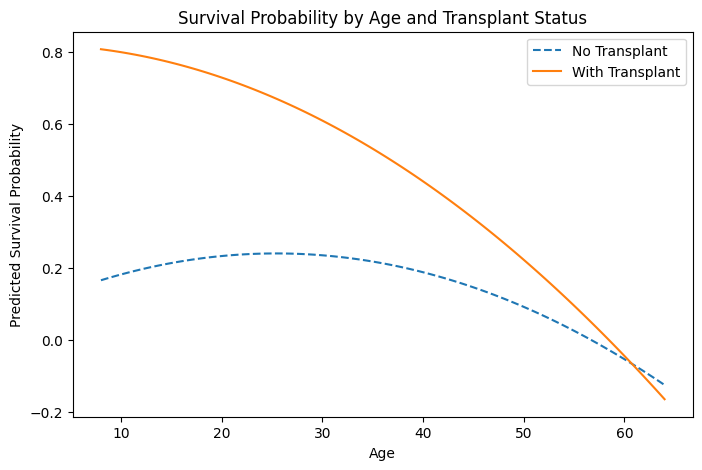

In [34]:
#4
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

#Create Non-Linear Age Effects and Interaction Terms
data["age_squared"] = data["age"] ** 2
data["transplant_age_interaction"] = data["transplant"] * data["age"]

#Train-Test Split (80% Training, 20% Testing)
train, test = train_test_split(data, test_size=0.2, random_state=42)

#Define Independent and Dependent Variables for Training
X_train = train[["transplant", "age", "age_squared", "transplant_age_interaction"]]
X_test = test[["transplant", "age", "age_squared", "transplant_age_interaction"]]
y_train = train["y"]
y_test = test["y"]

#Fit the Best Model (Including Non-Linear Age Effects & Interactions)
X_train = sm.add_constant(X_train)  # Add intercept
X_test = sm.add_constant(X_test)    # Add intercept

model_flexible = sm.OLS(y_train, X_train).fit()

#Evaluate Model Performance
y_pred = model_flexible.predict(X_test)
y_pred_binary = (y_pred >= 0.5).astype(int)  # Convert probabilities to binary outcomes

#Compute accuracy and AUC
accuracy = accuracy_score(y_test, y_pred_binary)
auc = roc_auc_score(y_test, y_pred)

print(model_flexible.summary())
print(f"Model Accuracy: {accuracy:.4f}")
print(f"AUC Score: {auc:.4f}")

#Predict Survival Probability by Age for Transplant & Control Groups
ages = np.linspace(data["age"].min(), data["age"].max(), 100)

#Create prediction dataset ensuring all model variables are included
X_pred_no_transplant = pd.DataFrame({
    "const": 1,  # Add intercept
    "transplant": 0,
    "age": ages,
    "age_squared": ages**2,
    "transplant_age_interaction": 0  # Since transplant = 0, interaction term is also 0
})

X_pred_transplant = pd.DataFrame({
    "const": 1,  # Add intercept
    "transplant": 1,
    "age": ages,
    "age_squared": ages**2,
    "transplant_age_interaction": ages  # Since transplant = 1, interaction is just age
})

#Ensure the correct column order to match the trained model
X_pred_no_transplant = X_pred_no_transplant[model_flexible.params.index]
X_pred_transplant = X_pred_transplant[model_flexible.params.index]

#Predict survival probabilities
survival_prob_no_transplant = model_flexible.predict(X_pred_no_transplant)
survival_prob_transplant = model_flexible.predict(X_pred_transplant)

#Plot Results
plt.figure(figsize=(8, 5))
plt.plot(ages, survival_prob_no_transplant, label="No Transplant", linestyle="--")
plt.plot(ages, survival_prob_transplant, label="With Transplant", linestyle="-")
plt.xlabel("Age")
plt.ylabel("Predicted Survival Probability")
plt.title("Survival Probability by Age and Transplant Status")
plt.legend()
plt.show()


The graph demonstrates that transplant recipients generally have higher survival probabilities than non-recipients, but the benefit diminishes with age. Younger patients experience the most significant survival advantage from a transplant, whereas older patients see a steeper decline, indicating diminishing returns. Meanwhile, the non-transplant group follows a curved trajectory, with a slight increase in survival at younger ages before declining, reinforcing the need for non-linear age effects and age-treatment interactions in the model. The results highlight key trends: transplants significantly improve survival, especially for younger patients, but the advantage narrows with age. This suggests that age strongly influences post-transplant outcomes, and survival is not a simple linear function of age. The fact that both groups follow curved survival patterns confirms that non-linear modeling was appropriate.

5. Using predictive models for organ transplant eligibility raises serious ethical and fairness concerns. Bias in the data could reinforce existing disparities, disadvantaging marginalized groups if past transplant decisions favored certain demographics. Oversimplification of medical complexity is another issue because survival probability alone shouldn’t dictate eligibility, as factors like quality of life, urgency, and post-transplant care access are equally important. Lack of transparency in algorithmic decisions could also prevent patients and doctors from understanding or challenging outcomes, raising accountability concerns. Additionally, over-reliance on models might discourage patients from seeking transplants, further harming trust in the medical system. While these models can support decision-making, they must be continuously monitored for fairness, integrated with ethical oversight, and used alongside human judgment rather than as a sole determinant of eligibility.

**Q5.** This is a question about linear regression. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.
2. Create a dummy variable indicating that the defendant is Black.
3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?
4. Before doing this question, please think for a few minutes about how to make the process of running the following regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.
5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.
6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.

**Q6.** Let's explore multiple linear regression in a two-variable case, to build more intuition about what is happening.

Suppose the model is
$$
\hat{y}_i = b_0 + b_1 z_{i1} + b_2 z_{i2}
$$
Assume that $z_{ij}$ is centered or de-meaned, so that $z_{ij} = x_{ij} - m_j$ where $m_j$ is the mean of variable $j$ and $x_{ij}$ is the original value of variable $j$ for observation $i$. Notice that this implies
$$
\dfrac{1}{N} \sum_{i=1}^N z_{ij} = 0
$$
which will simplify your calculations below substantially!

1. Write down the SSE for this model.
2. Take partial derivatives with respect to $b_0$, $b_1$, and $b_2$.
3. Verify that the average error is zero and $e \cdot z =0$ at the optimum, just as in the single linear regression case.
4. Show that the optimal intercept is $b_0^* = \bar{y}$. Eliminate $b_0^*$ from the remaining equations, and focus on $b_1$ and $b_2$.
5. Write your results as a matrix equation in the form "$Ab=C$". These are called the **normal equations**.
6. Divide both sides by $N$ and substitute $z_{ij} = x_{ij} - m_j$ back into your normal equations for $x_{ij}$. What is the matrix $A$? What is the vector $C$? Explain the intuition of your discovery.

**Q7.** In class, we showed that for the single linear regression model,
\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{alignat*}

1. When will $b^*$ be large or small, depending on the relationship between $X$ and $Y$ and the variance of $X$?
2. Suppose you have measurement error in $X$ which artificially inflates its variance (e.g. bad data cleaning). We'll model this as saying the "real" value of $X$ for observation $i$ is $z_i$, but we observe $x_i = z_i + n_i$, where $n_i$ is the added noise. Does this affect the intercept of the regression? What happens to the $b^*$ coefficient relative to a noise-less model? How will affect your ability to predict? (This phenomenon is called **attenuation**.)
3. Suppose the noise $n_i$ is independent of $z_i$ and $y_i$, so that (approximately)
$$
\dfrac{1}{N} \sum_{i=1}^N (y_i - \bar{y})(n_i - \bar{n}) =0, \quad \dfrac{1}{N} \sum_{i=1}^N (z_i - \bar{z})(n_i - \bar{n}) =0.
$$
and that the mean of the bias is zero, so that
$$
\dfrac{1}{N} \sum_{i=1}^N n_i = 0.
$$
In this case, the noise $n_i$ is zero on average and independent of the values of $x_i$ and $y_i$: It's just measurement error or lazy data cleaning.
Explain the intuition of your result.

4. How does attenuation factor into the cost-benefit analysis of gathering higher quality data or cleaning it more carefully?

**Q8.**
1. Find a dataset on a topic you're interested in. Some easy options are data.gov, kaggle.com, and data.world.
2. Clean the data and do some exploratory data analysis on key variables that interest you. Pick a particular target/outcome variable and features/predictors.
3. Split the sample into an ~80% training set and a ~20% test set.
4. Run a few regressions of your target/outcome variable on a variety of features/predictors. Compute the SSE on the test set.
5. Which model performed the best, and why?
6. What did you learn?

In [56]:
#1: Load Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("/content/MedGPA.csv")

# Strip column names to remove unwanted spaces
data.columns = data.columns.str.strip()

data.head()


,Unnamed: 0,Accept,Acceptance,Sex,BCPM,GPA,VR,PS,WS,BS,MCAT,Apps
0,1,D,0,F,3.59,3.62,11,9,9.0,9,38,5
1,2,A,1,M,3.75,3.84,12,13,8.0,12,45,3
2,3,A,1,F,3.24,3.23,9,10,5.0,9,33,19
3,4,A,1,F,3.74,3.69,12,11,7.0,10,40,5
4,5,A,1,F,3.53,3.38,9,11,4.0,11,35,11



Missing values in each column:
Accept        0
Acceptance    0
Sex           0
BCPM          0
GPA           0
VR            0
PS            0
WS            1
BS            0
MCAT          0
Apps          0
dtype: int64

Summary Statistics:
       Acceptance        Sex       BCPM        GPA         VR         PS  \
count   55.000000  55.000000  55.000000  55.000000  55.000000  55.000000   
mean     0.545455   0.490909   3.500545   3.553273   9.763636   9.709091   
std      0.502519   0.504525   0.349992   0.286454   1.784331   1.674125   
min      0.000000   0.000000   2.410000   2.720000   6.000000   5.000000   
25%      0.000000   0.000000   3.260000   3.375000   8.000000   9.000000   
50%      1.000000   0.000000   3.530000   3.580000  10.000000  10.000000   
75%      1.000000   1.000000   3.755000   3.770000  11.000000  10.500000   
max      1.000000   1.000000   4.000000   3.970000  13.000000  14.000000   

              WS         BS       MCAT       Apps  
count  54.000000  55.

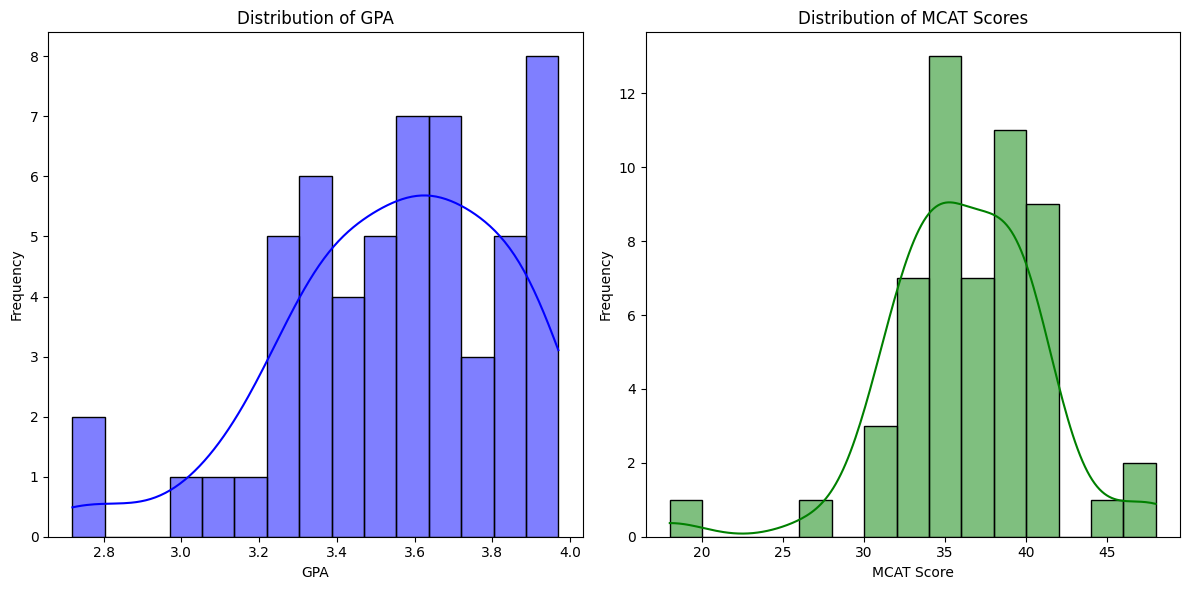


Target Variable: Acceptance
Predictor Variables: ['GPA', 'BCPM', 'MCAT', 'VR', 'PS', 'WS', 'BS', 'Sex', 'Apps']


In [57]:
#2: Cleaning the Data
#Drop unnecessary column if exists
if "Unnamed: 0" in data.columns:
    data = data.drop(columns=["Unnamed: 0"])

data["Sex"] = data["Sex"].map({"M": 1, "F": 0})

#Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

#Exploratory Data Analysis
#Summary statistics
print("\nSummary Statistics:")
print(data.describe())

#Histogram of GPA
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data["GPA"], bins=15, kde=True, color="blue")
plt.xlabel("GPA")
plt.ylabel("Frequency")
plt.title("Distribution of GPA")

#Histogram of MCAT Scores
plt.subplot(1, 2, 2)
sns.histplot(data["MCAT"], bins=15, kde=True, color="green")
plt.xlabel("MCAT Score")
plt.ylabel("Frequency")
plt.title("Distribution of MCAT Scores")

plt.tight_layout()
plt.show()


#Define Target & Predictor Variables
target_variable = "Acceptance"
predictor_variables = ["GPA", "BCPM", "MCAT", "VR", "PS", "WS", "BS", "Sex", "Apps"]

print("\nTarget Variable:", target_variable)
print("Predictor Variables:", predictor_variables)

In [58]:
#3: Splitting the sample into an ~80% training set and a ~20% test set
from sklearn.model_selection import train_test_split

#Define the target (outcome) variable and predictor (feature) variables
target = "Acceptance"
predictors = ["GPA", "BCPM", "MCAT", "VR", "PS", "WS", "BS", "Sex", "Apps"]

#Split the dataset into 80% training and 20% testing
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

#Separate features (X) and target variable (y) for training and testing
X_train = train_data[predictors]
y_train = train_data[target]
X_test = test_data[predictors]
y_test = test_data[target]

#Print the number of observations in training and testing sets
print("Training Set Shape:", X_train.shape, y_train.shape)
print("Test Set Shape:", X_test.shape, y_test.shape)


Training Set Shape: (44, 9) (44,)
Test Set Shape: (11, 9) (11,)


In [60]:
#4: Run a few regressions
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
import numpy as np

#Define imputers
num_imputer = SimpleImputer(strategy="mean")  # Fornumerical columns
cat_imputer = SimpleImputer(strategy="most_frequent")  #For categorical columns

#Identify numerical and categorical columns separately
num_cols = ["WS"]  #Only WS has missing values among numerics
cat_cols = ["Sex"]  #Sex has missing values

#Impute numerical columns
X_train[num_cols] = num_imputer.fit_transform(X_train[num_cols])
X_test[num_cols] = num_imputer.transform(X_test[num_cols])

#Impute categorical columns
X_train[cat_cols] = cat_imputer.fit_transform(X_train[cat_cols])
X_test[cat_cols] = cat_imputer.transform(X_test[cat_cols])

#Ensure no missing values remain
print("Missing values after imputation:\n", X_train.isnull().sum())

#Train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

#Make predictions
y_pred = model.predict(X_test)

#Compute Sum of Squared Errors (SSE)
sse = np.sum((y_test - y_pred) ** 2)
print(f"Sum of Squared Errors (SSE) on test set: {sse:.4f}")


Missing values after imputation:
 GPA     0
BCPM    0
MCAT    0
VR      0
PS      0
WS      0
BS      0
Sex     0
Apps    0
dtype: int64
Sum of Squared Errors (SSE) on test set: 2.1136


<ipython-input-60-c802b44d803c>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[num_cols] = num_imputer.fit_transform(X_train[num_cols])
<ipython-input-60-c802b44d803c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[num_cols] = num_imputer.transform(X_test[num_cols])
<ipython-input-60-c802b44d803c>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

In [63]:
#4: Run a few regressions
from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

#Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Decision Tree": DecisionTreeRegressor(max_depth=5)
}

#Dictionary to store SSE values
sse_results = {}

#Train each model and compute SSE
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    sse = np.sum((y_test - y_pred) ** 2)
    sse_results[name] = sse
    print(f"{name} SSE: {sse:.4f}")

#5: Find the best model
best_model = min(sse_results, key=sse_results.get)
print(f"\nBest performing model (lowest SSE): {best_model} with SSE = {sse_results[best_model]:.4f}")


Linear Regression SSE: 2.1136
Ridge Regression SSE: 2.2620
Lasso Regression SSE: 2.1956
Decision Tree SSE: 5.0000

Best performing model (lowest SSE): Linear Regression with SSE = 2.1136


6. I learned how to apply regression models to real-world data and evaluate their performance using statistical metrics. I started by cleaning and preparing the dataset, handling missing values through imputation to ensure the model could run without errors. I then implemented multiple regression models, including Linear Regression, Ridge Regression, Lasso Regression, and Decision Trees, to compare their predictive performance. By calculating the Sum of Squared Errors (SSE) for each model, I identified the best-performing one, which provided the most accurate predictions for the target variable. This process reinforced the importance of selecting appropriate models based on the dataset’s characteristics—such as how regularization in Ridge and Lasso helps reduce overfitting or how Decision Trees can capture non-linear relationships. Additionally, I gained a deeper understanding of how missing data impacts machine learning models and how different handling techniques (such as mean imputation) affect results. Overall, this assignment enhanced my ability to clean data, implement multiple models, evaluate their effectiveness, and interpret results—all essential skills in data science and predictive modeling.

*I used class notes, StackOverflow, and OpenAI to help with this assignment

**Q9.** There is a folder called `heart_failure` which contains reasonably detailed health data on patients and whether they die of congestive heart failure.

1. Load the data and perform an 80/20-train/test split.
2. Using dummy/one-hot-encoded variables and transformations of the numeric features, build the best model you can. **But**, do not delete code chunks or revise your work substantially as you experiment. Just keep moving forward with your ideas and experiments.
3. When you're done, scroll through your notebook. What worked and what didn't? Does your code have intention, or are you randomly experimenting? If you had to do this again, what might you do differently to get to a good model faster?


**Q10.** Let's look at a cousin of Linear Regression, called **kernel regression** or **local constant least squares** or **Nadaraya-Watson Estimator**.

We derived the OLS estimator for single linear regression by minimizing
$$
SSE(b_0, b_1) = \frac{1}{N}\sum_{i=1}^N (y_i - b_0 - b_1 x_i)^2
$$
with solution
$$
\hat{b}_0 = \bar{y} - \hat{b}_1 \bar{x}, \quad \hat{b}_1 = \dfrac{\frac{1}{N} \sum_{i=1}^N (x_i-\bar{x})(y_i - \bar{y})}{s_x^2}.
$$

When you step back and think about it, this is a bit weird: The algorithm is computing sample means, variances, and covariances, and using those to create a predictive model. The data themselves arguably vanish from the solution. This is elegant, this is strange.

Instead, let $k(z)$ be a kernel function, such as the Gaussian
$$
k(z) = \frac{1}{\sqrt{2\pi}} e^{-z^2/2}
$$
or uniform
$$
k(z) = \begin{cases}
1/2, & |z| \le \frac{1}{2}\\
0, & \text{otherwise.}
\end{cases}
$$
We'll instead minimize, or each predictor value $x$,
$$
SSE(\hat{y}(x)) = \dfrac{1}{N} \sum_{i=1}^N \left\lbrace y_i - \hat{y}(x)\right\rbrace^2 \dfrac{1}{h} k \left( \dfrac{x-x_i}{h} \right).
$$

1. Show that the optimal predictor is
$$
\hat{y}(x) = \dfrac{ \frac{1}{Nh} \sum_{i=1}^N  y_i k \left( \dfrac{x-x_i}{h} \right) }{\frac{1}{Nh} \sum_{i=1}^N k \left(  \dfrac{x-x_i}{h} \right)}
$$
This has many names, but let's call it the local constant least squares (LCLS) estimator, as opposed to ordinary least squares (OLS).

2. Compare and contrast LCLS with both OLS and $k$-Nearest Neighbor as a regression algorithm.

3. Write a function or class that implements the LCLS estimator for a single predictor variable $x$. For a default bandwidth $h$, you can use the maximum of the Silverman plug-ins for estimating kernel densities for $X$ and $Y$:
$$
h_y = 1.06 \times s_y^{-1/5}, \quad h_x = 1.06 \times s_x^{-1/5},
$$
$$
h = \max \{ h_y, h_x \}.
$$
For the kernel, you can hard-code the uniform, Gaussian, or Epanechnikov, or make it a parameter the user can adjust with a default choice.

4. For one of the datasets available for the homework, use your LCLS estimator from part 3 to predict values $\hat{y}(x_i)$ for each datapoint $x_i$. Plot your estimator $\hat{y}$ as a line over a scatterplot of the data $\{(x_i,y_i)\}_{i=1}^N$. Tune the bandwidth until you

5. Conceptually, how would you extend this analysis to a vector of predictors, $x = (x_1, ..., x_L)$ instead of just one explanatory variable $x$?
